<a href="https://colab.research.google.com/github/sanjanams742/sanjanams742/blob/main/intern_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

**TITLE: TITANIC CLASSIFICATION**

For building a Titanic classification system that predicts whether a person would survive the sinking, taking into account factors such as socio-economic status, age, gender, and more. This code will handle data loading, preprocessing, feature engineering, model training, evaluation, and making predictions.

In [ ]:
#titanic classification using random forest classifer
#import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# import datasets
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')

# Data Preprocessing
def preprocess_data(data):
    # Fill missing values for 'Age' with the median age
    data['Age'].fillna(data['Age'].median(), inplace=True)

    # Fill missing values for 'Embarked' with the mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Fill missing values for 'Fare' in the test set with the median fare
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

    # Drop the 'Cabin' column due to a large number of missing values
    data.drop('Cabin', axis=1, inplace=True)

    # Convert categorical columns to numerical ones using pd.get_dummies
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    return data

# Preprocess train and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Drop unnecessary columns
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Standardize the feature columns
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

# Define the features and target
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Split the training data for validation
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_valid, y_pred)}')
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

# Predict on the test set
test_predictions = model.predict(test_data)

# Prepare the submission file
submission = pd.DataFrame({'PassengerId': pd.read_csv('/test.csv')['PassengerId'], 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


Accuracy: 0.8156424581005587
[[90 15]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Submission file created!
      Feature  Importance
5    Sex_male    0.273316
4        Fare    0.272058
1         Age    0.252745
0      Pclass    0.078616
2       SibSp    0.052192
3       Parch    0.038490
7  Embarked_S    0.023095
6  Embarked_Q    0.009488


**TASK 2**

**TITLE: STOCK PREDICTION**

To create a stock price prediction model using LSTM (Long Short-Term Memory), we will follow these steps:

Import necessary libraries
Load the stock price data
Preprocess the data
Build and train the LSTM model
Make predictions and visualize the results

Here’s a complete code for predicting the stock price using LSTM. We will use the yfinance library to download stock price data and Keras with TensorFlow backend to build the LSTM model. For this example, let's use the stock data for Apple Inc. (AAPL).

[*********************100%%**********************]  1 of 1 completed


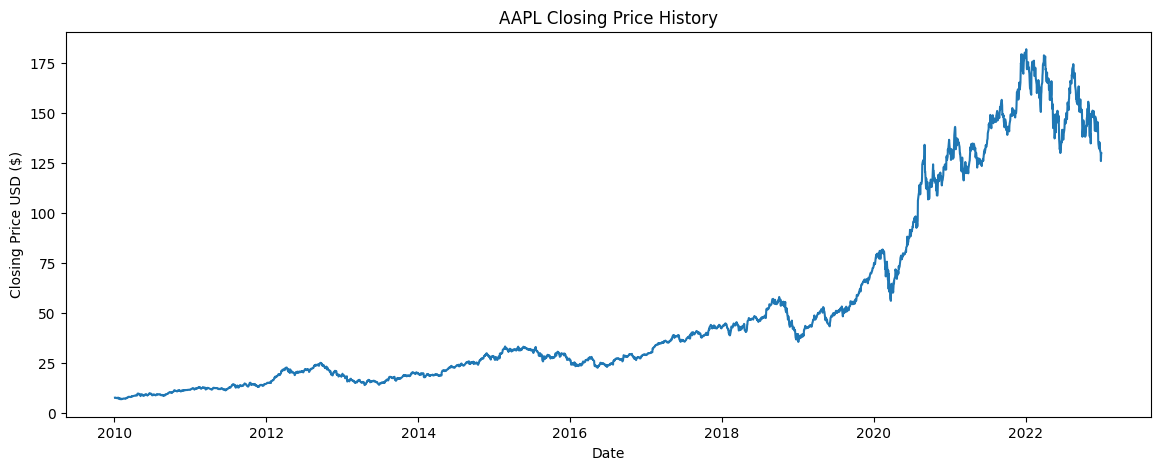

Epoch 1/20
2046/2046 [==============================] - 60s 28ms/step - loss: 1.0939e-04 - val_loss: 3.1040e-04
Epoch 2/20
2046/2046 [==============================] - 56s 27ms/step - loss: 4.7315e-05 - val_loss: 1.8850e-04
Epoch 3/20
2046/2046 [==============================] - 53s 26ms/step - loss: 3.1886e-05 - val_loss: 7.2917e-05
Epoch 4/20
2046/2046 [==============================] - 56s 27ms/step - loss: 3.0286e-05 - val_loss: 5.2398e-04
Epoch 5/20
2046/2046 [==============================] - 56s 27ms/step - loss: 2.0175e-05 - val_loss: 6.7393e-05
Epoch 6/20
2046/2046 [==============================] - 57s 28ms/step - loss: 2.4307e-05 - val_loss: 6.0204e-05
Epoch 7/20
2046/2046 [==============================] - 54s 26ms/step - loss: 1.9234e-05 - val_loss: 2.8332e-04
Epoch 8/20
2046/2046 [==============================] - 51s 25ms/step - loss: 1.8351e-05 - val_loss: 1.1426e-04
Epoch 9/20
2046/2046 [==============================] - 53s 26ms/step - loss: 1.7822e-05 - val_loss: 6.8

<ipython-input-10-443bef09107c>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


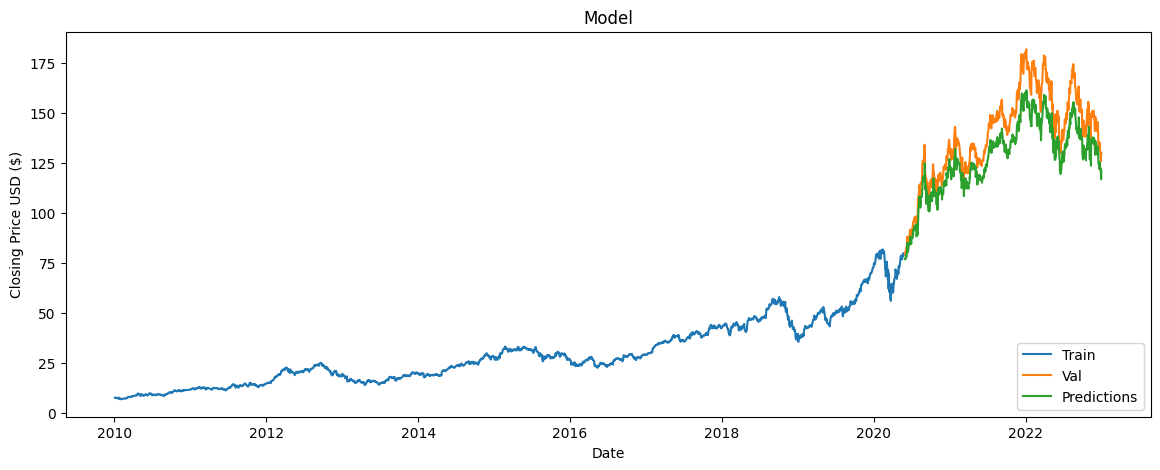

,Close,Predictions
Date,,
2020-05-29,79.485001,76.955994
2020-06-01,80.462502,76.920235
2020-06-02,80.834999,77.975700
2020-06-03,81.279999,78.164307
2020-06-04,80.580002,78.668449
...,...,...
2022-12-23,131.860001,121.802460
2022-12-27,130.029999,122.468712
2022-12-28,126.040001,120.469917


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)

# Load stock price data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2023-01-01')
data = data[['Close']]

# Plot the closing price history
plt.figure(figsize=(14, 5))
plt.plot(data['Close'])
plt.title(f'{stock_symbol} Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.show()

# Convert the dataframe to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, batch_size=1, epochs=20, validation_split=0.2, callbacks=[early_stop])

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data to be 3-dimensional for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(14, 5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Display the valid and predicted prices
valid


**Task : 4**

**TITLE: A/B Testing Analysis **

Step 1: Define the Objective and Hypothesis
Objective: To evaluate the impact of a new website design on the conversion rate.
Hypothesis:
𝐻
0
H
0
​
 : The new website design does not affect the conversion rate.
𝐻
1
H
1
​
 : The new website design affects the conversion rate.

Step 2: Design the Experiment
Metric: Conversion rate (percentage of visitors who make a purchase).
Population: Website visitors.
Control Group (A): Current website design.
Treatment Group (B): New website design.

Step 3: Collect Data
Assume we have collected the following data:
Control Group (A): 1000 visitors, 120 conversions.
Treatment Group (B): 1000 visitors, 150 conversions.

Step 4: Analyze the Results
Calculate Conversion Rates:

Conversion rate (A):
120
1000
=
0.12
1000
120
​
 =0.12 or 12%
Conversion rate (B):
150
1000
=
0.15
1000
150
​
 =0.15 or 15%
Perform Hypothesis Testing:

Use a two-sample t-test to compare the means of the two groups.
Let's perform the statistical analysis using Python.

Step 5: Draw Actionable Insights
Conversion Rate (A): 12%
Conversion Rate (B): 15%
Difference in Conversion Rates: 3%
Z-score: (calculated from the script)
P-value: (calculated from the script)
95% Confidence Interval: (calculated from the script)

Conclusion:

If the p-value is less than 0.05, we reject the null hypothesis and conclude that the new website design has a statistically significant impact on the conversion rate.
The 95% confidence interval provides a range in which we are 95% confident that the true difference in conversion rates lies.

In [13]:
import numpy as np
from scipy import stats

# Data input
conversions_A = 120
visitors_A = 1000
conversions_B = 150
visitors_B = 1000

# Calculate conversion rates
conversion_rate_A = conversions_A / visitors_A
conversion_rate_B = conversions_B / visitors_B

# Calculate standard errors
std_error_A = np.sqrt((conversion_rate_A * (1 - conversion_rate_A)) / visitors_A)
std_error_B = np.sqrt((conversion_rate_B * (1 - conversion_rate_B)) / visitors_B)

# Calculate difference in conversion rates
diff_conversion_rate = conversion_rate_B - conversion_rate_A

# Calculate standard error of the difference
std_error_diff = np.sqrt(std_error_A**2 + std_error_B**2)

# Calculate test statistic (z-score)
z_score = diff_conversion_rate / std_error_diff

# Calculate p-value
p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed test

# Calculate confidence interval (95%)
confidence_interval = (diff_conversion_rate - 1.96 * std_error_diff,
                       diff_conversion_rate + 1.96 * std_error_diff)

# Print results
print("Conversion Rate (Control Group A): {:.2%}".format(conversion_rate_A))
print("Conversion Rate (Treatment Group B): {:.2%}".format(conversion_rate_B))
print("Difference in Conversion Rates: {:.2%}".format(diff_conversion_rate))
print("Z-score: {:.4f}".format(z_score))
print("P-value: {:.4f}".format(p_value))
print("95% Confidence Interval: ({:.4%}, {:.4%})".format(confidence_interval[0], confidence_interval[1]))

# Interpretation and Insights
if p_value < 0.05:
    print("\nConclusion: The difference is statistically significant. Consider implementing the new design.")
else:
    print("\nConclusion: The difference is not statistically significant. Further investigation is needed.")

# Actionable Insights
print("\nActionable Insights:")

if p_value < 0.05:
    print("1. Implement the new website design as it has shown a statistically significant improvement in the conversion rate.")
    print("2. Monitor the performance of the new design continuously to ensure the improvement is sustained over time.")
    print("3. Consider running additional A/B tests with different variations of the website design to see if further improvements can be achieved.")
    print("4. Collect qualitative feedback from users about the new design to identify any areas for further enhancement.")
else:
    print("1. The new design did not show a statistically significant improvement. Reassess the design changes to understand why they might not have worked.")
    print("2. Consider running the A/B test again with a larger sample size to ensure sufficient statistical power.")
    print("3. Explore other design changes or different interventions that might have a more significant impact on the conversion rate.")
    print("4. Gather qualitative feedback from users to gain insights into their preferences and pain points with the current design.")


Conversion Rate (Control Group A): 12.00%
Conversion Rate (Treatment Group B): 15.00%
Difference in Conversion Rates: 3.00%
Z-score: 1.9649
P-value: 0.0494
95% Confidence Interval: (0.0075%, 5.9925%)

Conclusion: The difference is statistically significant. Consider implementing the new design.

Actionable Insights:
1. Implement the new website design as it has shown a statistically significant improvement in the conversion rate.
2. Monitor the performance of the new design continuously to ensure the improvement is sustained over time.
3. Consider running additional A/B tests with different variations of the website design to see if further improvements can be achieved.
4. Collect qualitative feedback from users about the new design to identify any areas for further enhancement.
